In [ ]:
!git clone https://github.com/Amlan-Deep/EMG-paper

Cloning into 'EMG-paper'...
remote: Enumerating objects: 6700, done.
remote: Counting objects: 100% (1872/1872), done.
remote: Compressing objects: 100% (1816/1816), done.


In [ ]:
'''
MI_Wavelet_CNN
@zdl
reference paper:https://ieeexplore.ieee.org/document/8585027
DataSet BCI Competition III dataSet II
MI task,binary classification
x_train (1152,3,140)
x_test  (1152,3,140)
'''
import os
import pandas as pd
import shutil

# Define the folder path
folder_path = r'/content/EMG-paper/gesture-split'

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Extract the gesture number from the filename
        gesture_number = int(filename.split('Gesture')[1][0])

        # Create a folder for the gesture if it doesn't exist
        gesture_folder = os.path.join(folder_path, f'gesture_{gesture_number}')
        if not os.path.exists(gesture_folder):
            os.makedirs(gesture_folder)

        # Move the CSV file to the corresponding gesture folder
        destination_path = os.path.join(gesture_folder, filename)
        shutil.move(file_path, destination_path)

# Now, the CSV files are moved to their respective gesture folders.


In [ ]:
import os
import pandas as pd

# Define the folder path
folder_path = r'/content/EMG-paper/gesture-split'

# Initialize a counter for naming DataFrames
counter = 1

# Iterate over the subfolders in the folder
for subfolder_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder_name)

    if os.path.isdir(subfolder_path):
        # Iterate over the files in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subfolder_path, filename)

                # Read the CSV file into a DataFrame
                df = pd.read_csv(file_path)

                column_mapping = {col: f'channel_{i}' for i, col in enumerate(df.columns, start=1)}
                df.rename(columns=column_mapping, inplace=True)

                df_name = f'df{counter}'

                globals()[df_name] = df

                counter += 1


<ipython-input-3-998058d00aa5>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


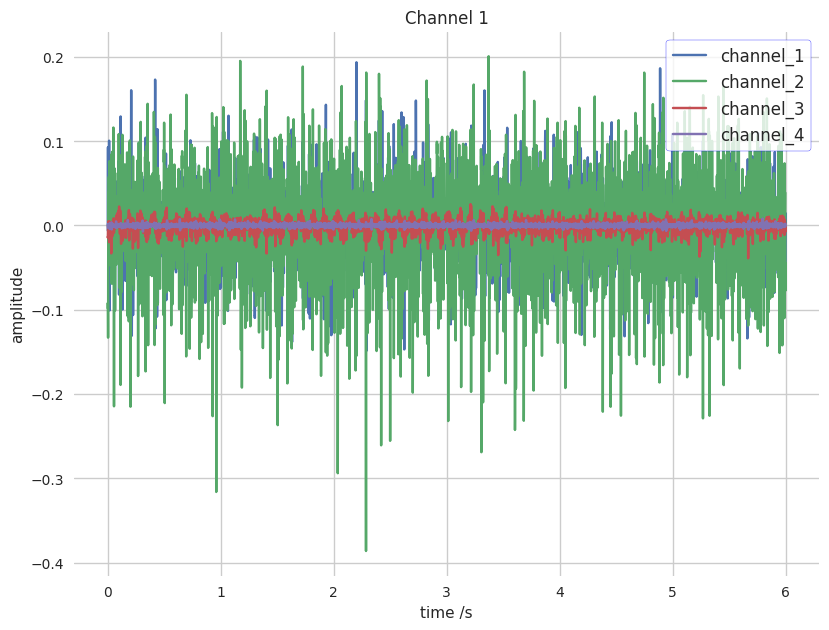

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_style("whitegrid")
# Define the sampling rate
sampleRate = 2000  # EEG sample rate

t = np.linspace(0, df1.shape[0] / sampleRate, df1.shape[0])

# Create a list of DataFrames
data_frames = [ df34 ]

plt.figure(figsize=(16, 12))


# Create subplots for each channel
for i, df in enumerate(data_frames, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    for col in df.columns:
        plt.plot(t, df[col], label=col)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Channel {i}')
    plt.legend()

plt.tight_layout()  # Ensure proper layout of subplots
plt.xlabel('time /s')
plt.ylabel('amplitude')
plt.legend(loc='upper right',fontsize='large',frameon=True,edgecolor='blue')
plt.show()  # Display the plot


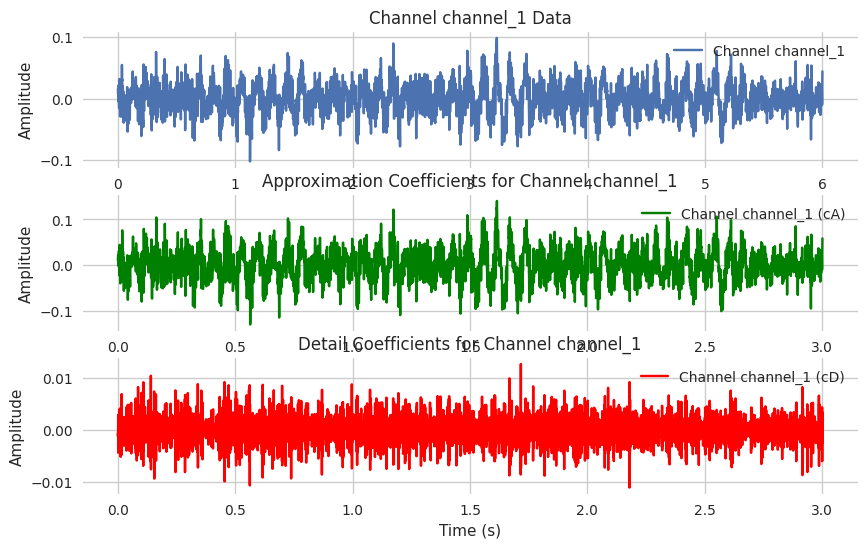

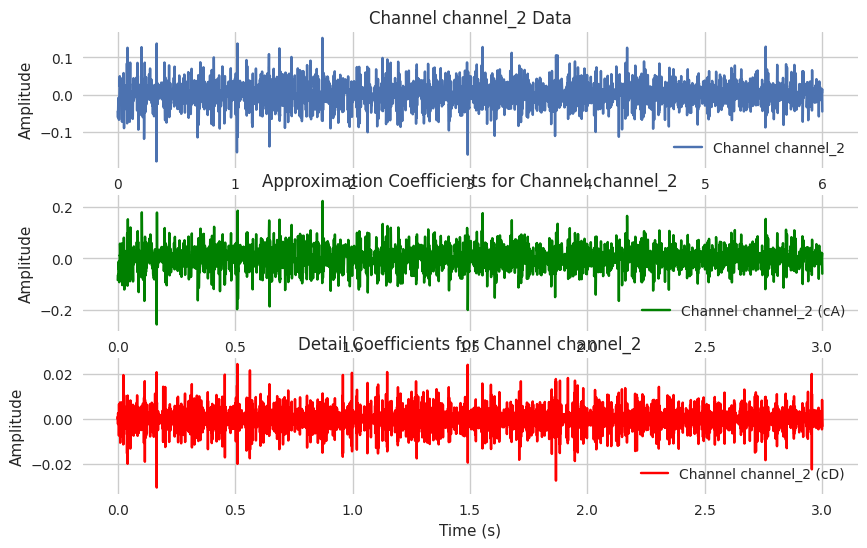

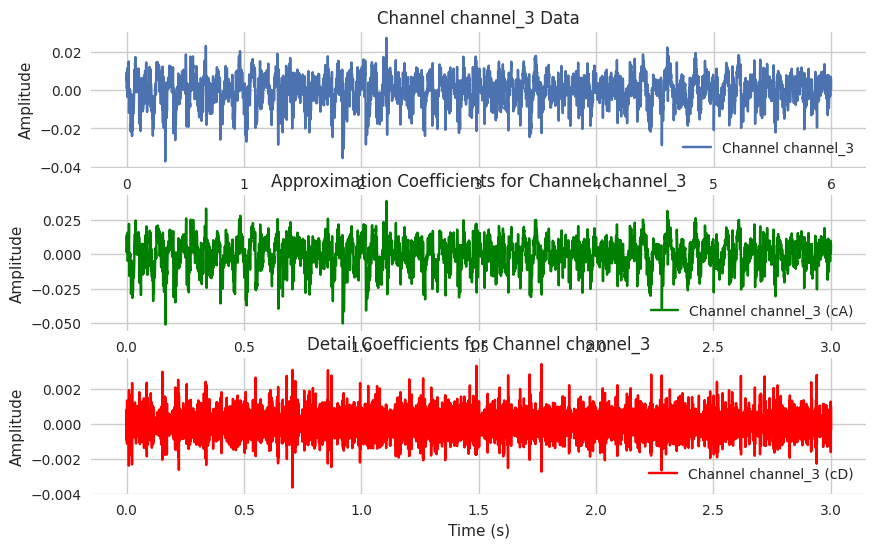

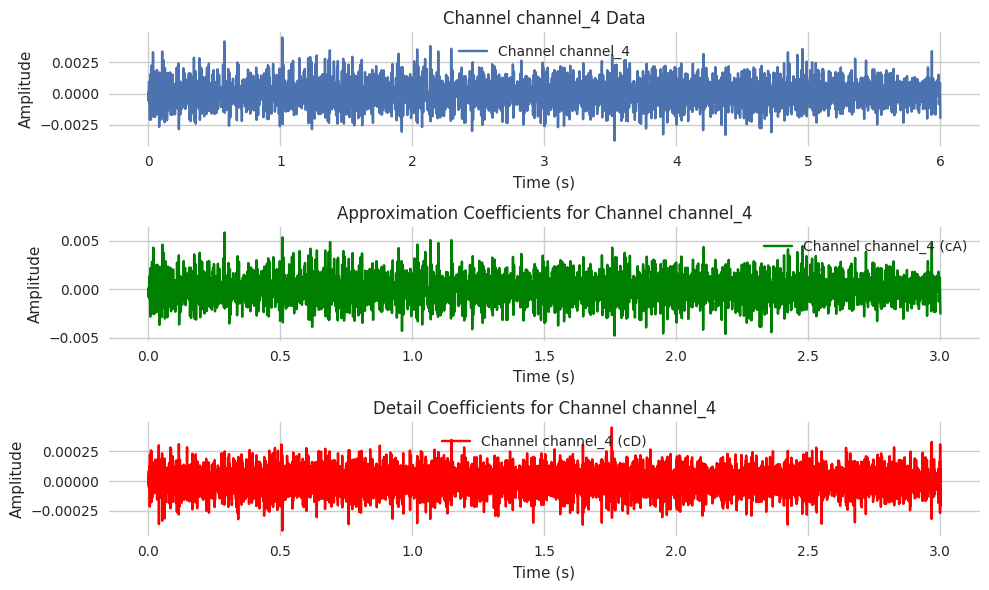

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

In [ ]:
import pywt
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")


# Initialize a list to store the subplots
subplots = []

# Create subplots for each channel
for col in df2.columns:
    cA, cD = pywt.dwt(df2[col], 'db4')

    # Create a new figure for each channel
    plt.figure(figsize=(10, 6))

    # Plot the original channel data
    plt.subplot(3, 1, 1)
    plt.plot(t, df2[col], label=f'Channel {col}')
    plt.title(f'Channel {col} Data')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the approximation coefficients (cA)
    plt.subplot(3, 1, 2)
    plt.plot(t[:len(cA)], cA, '-g', label=f'Channel {col} (cA)')
    plt.title(f'Approximation Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the detail coefficients (cD)
    plt.subplot(3, 1, 3)
    plt.plot(t[:len(cD)], cD, '-r', label=f'Channel {col} (cD)')
    plt.title(f'Detail Coefficients for Channel {col}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Store the subplot
    subplots.append(plt)

# Display all subplots
for subplot in subplots:
    subplot.tight_layout()
    subplot.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (gesture_0, gesture_1, etc.)
input_folder_path = '/content/EMG-paper/gesture-split'

# Create a directory to save the images
output_directory = 'gesture_split_images'
os.makedirs(output_directory, exist_ok=True)

# Initialize a set to keep track of processed file names
processed_files = set()

# Iterate over subfolders (gesture_0, gesture_1, etc.) within the input folder
for gesture_folder_name in os.listdir(input_folder_path):
    gesture_folder_path = os.path.join(input_folder_path, gesture_folder_name)

    if not os.path.isdir(gesture_folder_path):
        continue  # Skip if it's not a folder

    # Create a subfolder in the output_directory
    output_subfolder = os.path.join(output_directory, gesture_folder_name)
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(gesture_folder_path):
        if csv_filename.endswith('.csv'):
            image_filename = f'{csv_filename}_Channel_1.jpg'
            image_filepath = os.path.join(output_subfolder, image_filename)

            # Check if the image file already exists in the output folder
            if os.path.isfile(image_filepath):
                print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
                continue

            print(f"Processing {csv_filename}")  # Debugging statement

            csv_filepath = os.path.join(gesture_folder_path, csv_filename)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)

            # Use only the first column
            data = df.iloc[:, 0]

            # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

            # Create an image
            fig = plt.figure()
            plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
            plt.ylabel("Frequency (Hz)")
            plt.xlabel("Time (s)")
            plt.colorbar()
            plt.title(f'Wavelet Transform - {csv_filename}, Channel 1')

            filepath = os.path.join(output_subfolder, image_filename)
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight')
            plt.close()

            # Add the processed file name to the set
            processed_files.add(image_filename)

print('Wavelet transform completed. Images are saved in the "gesture_split_images" folder.')



Skipping Participant14_Rep0_Gesture1.csv. Image already exists.
Skipping Participant15_Rep1_Gesture1.csv. Image already exists.
Skipping Participant28_Rep4_Gesture1.csv. Image already exists.
Skipping Participant10_Rep4_Gesture1.csv. Image already exists.
Skipping Participant12_Rep2_Gesture1.csv. Image already exists.
Skipping Participant4_Rep2_Gesture1.csv. Image already exists.
Skipping Participant12_Rep4_Gesture1.csv. Image already exists.
Skipping Participant30_Rep3_Gesture1.csv. Image already exists.
Skipping Participant1_Rep0_Gesture1.csv. Image already exists.
Skipping Participant38_Rep0_Gesture1.csv. Image already exists.
Skipping Participant24_Rep4_Gesture1.csv. Image already exists.
Skipping Participant21_Rep1_Gesture1.csv. Image already exists.
Skipping Participant24_Rep1_Gesture1.csv. Image already exists.
Skipping Participant27_Rep4_Gesture1.csv. Image already exists.
Skipping Participant30_Rep2_Gesture1.csv. Image already exists.
Skipping Participant36_Rep2_Gesture1.csv. 

In [ ]:
pip install Pillow

In [ ]:
import os
from PIL import Image

# Input folder path containing the images to crop
input_folder_path = '/content/EMG-paper/gesture-images/gesture_0'  # Replace with your input folder path

# Output folder path to save the cropped images
output_folder_path = '/content/EMG-paper/cropped-gestures'  # Replace with your output folder path

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)

# Flag to indicate if we've processed the first image
first_image_processed = False

# Loop through each image in the input folder
for image_filename in os.listdir(input_folder_path):
    if image_filename.endswith('.jpg'):
        # Construct the input and output file paths
        input_image_path = os.path.join(input_folder_path, image_filename)
        output_image_path = os.path.join(output_folder_path, image_filename)

        # Open the input image
        img = Image.open(input_image_path)

        # Define the cropping box (adjust these values as needed)
        left = 83  # Adjust the left cropping margin
        top = 35   # Adjust the top cropping margin
        right = img.width - 105  # Adjust the right cropping margin
        bottom = img.height - 57  # Adjust the bottom cropping margin

        # Crop the image
        cropped_img = img.crop((left, top, right, bottom))

        # Save the cropped image to the output folder
        cropped_img.save(output_image_path)

        print(f"Cropped and saved: {output_image_path}")

        # Set the flag to indicate that we've processed the first image
        first_image_processed = True


# Check if no images were found in the input folder
if not first_image_processed:
    print("No images found in the input folder.")


Cropped and saved: /content/EMG-paper/cropped-gestures/Participant8_Rep3_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant2_Rep0_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant40_Rep0_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant12_Rep4_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant1_Rep2_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant19_Rep1_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant27_Rep3_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant38_Rep1_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant25_Rep3_Gesture0.csv_Channel_1.jpg
Cropped and saved: /content/EMG-paper/cropped-gestures/Participant21_Rep4_Gesture0.csv_Channel

In [ ]:
# import os

# # Specify the folder path that you want to delete files from
# folder_path = '/content/EMG-paper/cropped-gestures'  # Replace with your folder path

# # List all files in the folder
# files = os.listdir(folder_path)

# # Loop through the files and delete each one
# for file in files:
#     file_path = os.path.join(folder_path, file)
#     if os.path.isfile(file_path):
#         os.remove(file_path)
#         print(f"Deleted file: {file_path}")

# print("All files in the folder have been deleted.")


Deleted file: /content/EMG-paper/cropped-gestures/Participant8_Rep3_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant2_Rep0_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant40_Rep0_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant1_Rep2_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant19_Rep1_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant27_Rep3_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant38_Rep1_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant25_Rep3_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant21_Rep4_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-gestures/Participant3_Rep0_Gesture0.csv_Channel_1.jpg
Deleted file: /content/EMG-paper/cropped-ges

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Folder path containing the CSV file to process
input_folder_path = '/content/EMG-paper/gesture-split/gesture_0'  # Replace with your folder path

# Create a directory to save the images
output_directory = 'cropped_gesture_images'
os.makedirs(output_directory, exist_ok=True)

# Initialize a set to keep track of processed file names
processed_files = set()

# CSV file name to process (modify this with the file you want to process)
csv_filename = 'Participant10_Rep2_Gesture0.csv'

image_filename = f'{csv_filename}_Channel_1.jpg'
image_filepath = os.path.join(output_directory, image_filename)

# Check if the image file already exists in the output folder
if os.path.isfile(image_filepath):
    print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
else:
    print(f"Processing {csv_filename}")  # Debugging statement

    csv_filepath = os.path.join(input_folder_path, csv_filename)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_filepath)

    # Use only the first column
    data = df.iloc[:, 0]

    # Perform wavelet transform
    [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

    # Create an image without axis labels and ticks
    fig = plt.figure()
    plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
    plt.axis('off')  # Turn off axis labels and ticks

    filepath = os.path.join(output_directory, image_filename)
    os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
    fig.savefig(filepath, bbox_inches='tight', pad_inches=0)
    plt.close()

    # Add the processed file name to the set
    processed_files.add(image_filename)

print('Wavelet transform completed. Images are saved')


Processing Participant10_Rep2_Gesture0.csv
Wavelet transform completed. Images are saved


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import os
import pandas as pd

# Set the plotting style
plt.style.use('classic')

# Sampling rate
sampling_rate = 2000

# Wavelet parameters
wavename = 'morl'
totalscal = 1000
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(1, totalscal + 1)

# Fixed folder path containing subfolders (gesture_0, gesture_1, etc.)
input_folder_path = '/content/EMG-paper/gesture-split'

# Create a directory to save the images
output_directory = 'gesture_cropped_images'
os.makedirs(output_directory, exist_ok=True)

# Initialize a set to keep track of processed file names
processed_files = set()

# Iterate over subfolders (gesture_0, gesture_1, etc.) within the input folder
for gesture_folder_name in os.listdir(input_folder_path):
    gesture_folder_path = os.path.join(input_folder_path, gesture_folder_name)

    if not os.path.isdir(gesture_folder_path):
        continue  # Skip if it's not a folder

    # Create a subfolder in the output_directory
    output_subfolder = os.path.join(output_directory, gesture_folder_name)
    os.makedirs(output_subfolder, exist_ok=True)

    # Loop through each CSV file in the subfolder
    for csv_filename in os.listdir(gesture_folder_path):
        if csv_filename.endswith('.csv'):
            image_filename = f'{csv_filename}_Channel_1.jpg'
            image_filepath = os.path.join(output_subfolder, image_filename)

            # Check if the image file already exists in the output subfolder
            if os.path.isfile(image_filepath):
                print(f"Skipping {csv_filename}. Image already exists.")  # Debugging statement
                continue

            print(f"Processing {csv_filename}")  # Debugging statement

            csv_filepath = os.path.join(gesture_folder_path, csv_filename)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(csv_filepath)

            # Use only the first column
            data = df.iloc[:, 0]

               # Perform wavelet transform
            [cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)

            # Create an image without axis labels and ticks
            fig = plt.figure()
            plt.contourf(np.arange(len(data)) / sampling_rate, frequencies, abs(cwtmatr))
            plt.axis('off')  # Turn off axis labels and ticks

            filepath = os.path.join(output_subfolder, image_filename)
            os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Create subdirectories as needed
            fig.savefig(filepath, bbox_inches='tight', pad_inches=0)
            plt.close()

            # Add the processed file name to the set
            processed_files.add(image_filename)

print('Wavelet transform completed. Images are saved in the "gesture_cropped_images" folder.')


Skipping Participant14_Rep0_Gesture1.csv. Image already exists.
Skipping Participant15_Rep1_Gesture1.csv. Image already exists.
Skipping Participant28_Rep4_Gesture1.csv. Image already exists.
Skipping Participant10_Rep4_Gesture1.csv. Image already exists.
Skipping Participant12_Rep2_Gesture1.csv. Image already exists.
Skipping Participant4_Rep2_Gesture1.csv. Image already exists.
Skipping Participant12_Rep4_Gesture1.csv. Image already exists.
Skipping Participant30_Rep3_Gesture1.csv. Image already exists.
Skipping Participant1_Rep0_Gesture1.csv. Image already exists.
Skipping Participant38_Rep0_Gesture1.csv. Image already exists.
Skipping Participant24_Rep4_Gesture1.csv. Image already exists.
Skipping Participant21_Rep1_Gesture1.csv. Image already exists.
Skipping Participant24_Rep1_Gesture1.csv. Image already exists.
Skipping Participant27_Rep4_Gesture1.csv. Image already exists.
Skipping Participant30_Rep2_Gesture1.csv. Image already exists.
Skipping Participant36_Rep2_Gesture1.csv. 

In [ ]:
import shutil
import os

# Define the folder you want to download (change this to your folder's path)
folder_to_download = '/content/gesture_cropped_images'

# Create a ZIP archive of the folder
shutil.make_archive("/content/downloaded_folder", 'zip', folder_to_download)

# Move the ZIP archive to the /content directory (Colab's working directory)
os.rename("/content/downloaded_folder.zip", "/content/downloaded_folder.zip")

print("Folder zipped successfully.")


Folder zipped successfully.


In [ ]:
from google.colab import files

# Specify the path to the ZIP archive you want to download
zip_file_path = "/content/downloaded_folder.zip"

# Use the files.download function to download the file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# Define the path to the main folder containing subfolders (gesture_0, gesture_1, ..., gesture_9)
main_folder_path = '/content/EMG-paper/amloo/gesture-cropped-images/gesture-cropped-images'

# Function to rename images in a subfolder
def rename_images_in_subfolder(subfolder_path, gesture_number):
    for root, _, files in os.walk(subfolder_path):
        for i, filename in enumerate(files):
            _, ext = os.path.splitext(filename)
            new_filename = f"{gesture_number}_{i}{ext}"
            old_file_path = os.path.join(root, filename)
            new_file_path = os.path.join(root, new_filename)
            os.rename(old_file_path, new_file_path)

# Loop through the subfolders and rename the images
for gesture_number in range(10):
    subfolder_name = f'gesture_{gesture_number}'
    subfolder_path = os.path.join(main_folder_path, subfolder_name)

    if os.path.exists(subfolder_path):
        rename_images_in_subfolder(subfolder_path, gesture_number)
        print(f'Renamed images in {subfolder_name} to {gesture_number}_0, {gesture_number}_1, ...')
    else:
        print(f'Subfolder {subfolder_name} not found.')

print("Image renaming completed.")


Renamed images in gesture_0 to 0_0, 0_1, ...
Renamed images in gesture_1 to 1_0, 1_1, ...
Renamed images in gesture_2 to 2_0, 2_1, ...
Renamed images in gesture_3 to 3_0, 3_1, ...
Renamed images in gesture_4 to 4_0, 4_1, ...
Renamed images in gesture_5 to 5_0, 5_1, ...
Renamed images in gesture_6 to 6_0, 6_1, ...
Renamed images in gesture_7 to 7_0, 7_1, ...
Renamed images in gesture_8 to 8_0, 8_1, ...
Renamed images in gesture_9 to 9_0, 9_1, ...
Image renaming completed.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to get file paths and labels
def get_file_paths(filename):
    data_paths = []  # Store file paths
    labels = []      # Store corresponding labels
    for label in os.listdir(filename):
        label_path = os.path.join(filename, label)
        if os.path.isdir(label_path):
            for pic in os.listdir(label_path):
                data_paths.append(os.path.join(label_path, pic))
                labels.append(label)  # Store the label as a string
    return data_paths, labels

# Dataset folder path
pathname = r"/content/EMG-paper/amloo/gesture-cropped-images/gesture-cropped-images"

# Get file paths and labels
image_paths, labels = get_file_paths(pathname)

# Train-test split (90% train, 10% test)
X_train_paths, X_test_paths, Y_train, Y_test = train_test_split(
    image_paths, labels, test_size=0.10, random_state=42
)

# Convert labels to integers
label_to_index = {label: i for i, label in enumerate(np.unique(labels))}
Y_train = np.array([label_to_index[label] for label in Y_train], dtype=np.int32)
Y_test = np.array([label_to_index[label] for label in Y_test], dtype=np.int32)

# One-hot encode labels
num_classes = len(label_to_index)
Y_train = tf.one_hot(Y_train, depth=num_classes, dtype=tf.float32)
Y_test = tf.one_hot(Y_test, depth=num_classes, dtype=tf.float32)

# ... Rest of the code ...


# Define your model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train your model on X_train and Y_train
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate your model on X_test and Y_test
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
48/48 [==============================] - 16s 310ms/step - loss: 2.0297 - accuracy: 0.2541 - val_loss: 1.7357 - val_accuracy: 0.3631
Epoch 2/10
48/48 [==============================] - 14s 297ms/step - loss: 1.6232 - accuracy: 0.3852 - val_loss: 1.6749 - val_accuracy: 0.3810
Epoch 3/10
48/48 [==============================] - 14s 298ms/step - loss: 1.4222 - accuracy: 0.4653 - val_loss: 1.4902 - val_accuracy: 0.4405
Epoch 4/10
48/48 [==============================] - 14s 300ms/step - loss: 1.2853 - accuracy: 0.5275 - val_loss: 1.4968 - val_accuracy: 0.4345
Epoch 5/10
48/48 [==============================] - 14s 297ms/step - loss: 1.1434 - accuracy: 0.5685 - val_loss: 1.3860 - val_accuracy: 0.4762
Epoch 6/10
48/48 [==============================] - 15s 306ms/step - loss: 0.9815 - accuracy: 0.6267 - val_loss: 1.4504 - val_accuracy: 0.4821
Epoch 7/10
48/48 [==============================] - 14s 299ms/step - loss: 0.7929 - accuracy: 0.7101 - val_loss: 1.5318 - val_accuracy: 0.4821

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

def create_cnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    return model

data_folder = '/content/EMG-paper/amloo/gesture-cropped-images/gesture-cropped-images'
class_names = sorted(os.listdir(data_folder))  # Get a sorted list of class names

# Create a dictionary to map class names to integers
class_to_int = {class_name: i for i, class_name in enumerate(class_names)}

image_height, image_width, image_channels = 620, 480, 3  # Adjust these values as per your image size and channels

# Define the number of classes in your dataset
num_classes = len(class_names)
data = []
labels = []

# Iterate through subfolders and load images
for class_folder in class_names:
    class_path = os.path.join(data_folder, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
            img_array = keras.preprocessing.image.img_to_array(img)
            data.append(img_array)
            labels.append(class_to_int[class_folder])

data = np.array(data)
labels = np.array(labels)

# Normalize pixel values to [0, 1]
data = data / 255.0

# One-hot encode labels
labels = keras.utils.to_categorical(labels, num_classes)

num_folds = 10
fold_size = len(data) // num_folds

for fold in range(num_folds):
    # Split data into train and validation sets
    val_data = data[fold * fold_size:(fold + 1) * fold_size]
    val_labels = labels[fold * fold_size:(fold + 1) * fold_size]
    train_data = np.concatenate([data[:fold * fold_size], data[(fold + 1) * fold_size:]], axis=0)
    train_labels = np.concatenate([labels[:fold * fold_size], labels[(fold + 1) * fold_size:]], axis=0)

    # Create and compile the model
    model = create_cnn_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

    # Evaluate the model
    loss, accuracy = model.evaluate(val_data, val_labels)
    print(f"Fold {fold + 1} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")


KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

def create_cnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.5))  # Add dropout here
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))  # Add dropout here
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    return model


data_folder = '/content/EMG-paper/amloo/gesture-cropped-images/gesture-cropped-images'
class_names = sorted(os.listdir(data_folder))  # Get a sorted list of class names

# Create a dictionary to map class names to integers
class_to_int = {class_name: i for i, class_name in enumerate(class_names)}

image_height, image_width, image_channels = 620, 480, 3  # Adjust these values as per your image size and channels

# Define the number of classes in your dataset
num_classes = len(class_names)
data = []
labels = []

# Iterate through subfolders and load images
for class_folder in class_names:
    class_path = os.path.join(data_folder, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
            img_array = keras.preprocessing.image.img_to_array(img)
            data.append(img_array)
            labels.append(class_to_int[class_folder])

data = np.array(data)
labels = np.array(labels)

# Normalize pixel values to [0, 1]
data = data / 255.0

# One-hot encode labels
labels = keras.utils.to_categorical(labels, num_classes)

num_folds = 10
fold_size = len(data) // num_folds

for fold in range(num_folds):

    if os.path.exists(f"model_weights_fold_{fold}.h5"):
        print(f"Skipping fold {fold + 1} as model weights already exist.")
        continue
    # Split data into train and validation sets
    val_data = data[fold * fold_size:(fold + 1) * fold_size]
    val_labels = labels[fold * fold_size:(fold + 1) * fold_size]
    train_data = np.concatenate([data[:fold * fold_size], data[(fold + 1) * fold_size:]], axis=0)
    train_labels = np.concatenate([labels[:fold * fold_size], labels[(fold + 1) * fold_size:]], axis=0)

    # Create and compile the model
    model = create_cnn_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

    # Evaluate the model
    loss, accuracy = model.evaluate(val_data, val_labels)
    print(f"Fold {fold + 1} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")


Epoch 1/10
53/53 [==============================] - 292s 6s/step - loss: 6.4269 - accuracy: 0.2500 - val_loss: 4.0567 - val_accuracy: 0.1720
Epoch 2/10
53/53 [==============================] - 257s 5s/step - loss: 1.5607 - accuracy: 0.4363 - val_loss: 4.2261 - val_accuracy: 0.1344
Epoch 3/10
53/53 [==============================] - 285s 5s/step - loss: 1.2770 - accuracy: 0.5393 - val_loss: 5.6068 - val_accuracy: 0.2204
Epoch 4/10
53/53 [==============================] - 250s 5s/step - loss: 1.1581 - accuracy: 0.5929 - val_loss: 5.5052 - val_accuracy: 0.1989
Epoch 5/10
53/53 [==============================] - 248s 5s/step - loss: 0.9558 - accuracy: 0.6452 - val_loss: 5.6734 - val_accuracy: 0.1452
Epoch 6/10
53/53 [==============================] - 284s 5s/step - loss: 0.8215 - accuracy: 0.7065 - val_loss: 7.8052 - val_accuracy: 0.2204
Epoch 7/10
53/53 [==============================] - 247s 5s/step - loss: 0.6782 - accuracy: 0.7458 - val_loss: 6.3741 - val_accuracy: 0.2742
Epoch 8/10
53